In [1]:
from utils import read_mp3, normalize_impulse
import scipy.signal

In [2]:
imps = [normalize_impulse(read_mp3("impulses/" + str(i) + ".mp3")[1]) for i in range(1, 6)]

In [3]:
stfts = [scipy.signal.stft(imp[:, 0], nperseg=128) for imp in imps]

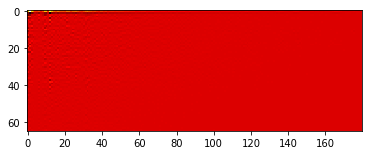

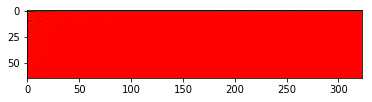

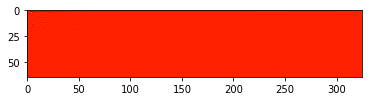

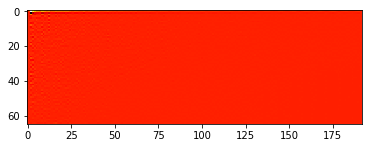

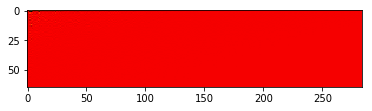

In [7]:
import matplotlib.pyplot as plt

for stft in stfts:
    plt.imshow(stft[2].real, cmap='hot', interpolation='nearest')
    plt.show()

In [65]:
stfts[4][2].real.min()

-0.672541330811508

In [5]:
from os import listdir

songName = listdir("vocaloid")[142]

In [10]:
rate, data = read_mp3("vocaloid/" + songName)
scipy.io.wavfile.write("orig.wav", 48000, data)
res = scipy.signal.convolve(data, imps[0])
res = res / res.max()
scipy.io.wavfile.write("test.wav", 48000, res)